# Visualisierung Parkinson

## Laden der Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Laden der CSV Datei

In [14]:
df = pd.read_csv('processed_dataset.csv')
df

subject#  age sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72   M        5.0       28.199       34.398    0.00662   
1            1   72   M       12.0       28.447       34.894    0.00300   
2            1   72   M       19.0       28.695       35.389    0.00481   
3            1   72   M       25.0       28.905       35.810    0.00528   
4            1   72   M       33.0       29.187       36.375    0.00335   
...        ...  ...  ..        ...          ...          ...        ...   
5870        42   61   M      142.0       22.485       33.485    0.00406   
5871        42   61   M      149.0       21.988       32.988    0.00297   
5872        42   61   M      156.0       21.495       32.495    0.00349   
5873        42   61   M      163.0       21.007       32.007    0.00281   
5874        42   61   M      170.0       20.513       31.513    0.00282   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer:APQ5  Shimmer:APQ11  \
0        0.000034     0.00401      0.00317  ...       0.01309        0.01662   
1        0.000017     0.00132      0.00150  ...       0.01072        0.01689   
2        0.000025     0.00205      0.00208  ...       0.00844        0.01458   
3        0.000027     0.00191      0.00264  ...       0.01265        0.01963   
4        0.000020     0.00093      0.00130  ...       0.00929        0.01819   
...           ...         ...          ...  ...           ...            ...   
5870     0.000031     0.00167      0.00168  ...       0.01133        0.01549   
5871     0.000025     0.00119      0.00147  ...       0.01277        0.01904   
5872     0.000025     0.00152      0.00187  ...       0.01456        0.01877   
5873     0.000020     0.00128      0.00151  ...       0.00870        0.01307   
5874     0.000021     0.00135      0.00166  ...       0.01154        0.01470   

      Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  \
0         0.04314  0.014290  21.640  0.41888  0.54842  0.16006   
1         0.02982  0.011112  27.183  0.43493  0.56477  0.10810   
2         0.02202  0.020220  23.047  0.46222  0.54405  0.21014   
3         0.03317  0.027837  24.445  0.48730  0.57794  0.33277   
4         0.02036  0.011625  26.126  0.47188  0.56122  0.19361   
...           ...       ...     ...      ...      ...      ...   
5870      0.02920  0.025137  22.369  0.64215  0.55314  0.21367   
5871      0.03157  0.011927  22.886  0.52598  0.56518  0.12621   
5872      0.04112  0.017701  25.065  0.47792  0.57888  0.14157   
5873      0.02078  0.007984  24.422  0.56865  0.56327  0.14204   
5874      0.02839  0.008172  23.259  0.58608  0.57077  0.15336   

      motor_Jitter_interaction  motor_Shimmer_interaction  
0                     0.186677                   0.723304  
1                     0.085341                   0.575767  
2                     0.138023                   0.480641  
3                     0.152618                   0.667416  
4                     0.097776                   0.497055  
...                        ...                        ...  
5870                  0.091289                   0.426316  
5871                  0.065304                   0.509022  
5872                  0.075018                   0.537160  
5873                  0.059030                   0.311744  
5874                  0.057847                   0.391183  

[5875 rows x 24 columns]

## Den visuellen Stil festlegen

In [15]:
# Setzen des Plot-Stils
sns.set_style("whitegrid")

# Setzen des Kontexts für die Skalierung der Plot-Elemente, speziell für Notebooks
sns.set_context("notebook", font_scale=1.5)  

# Setzen der Farbpalette, die farbenblind freundlich ist
sns.set_palette("colorblind")

# Matplotlib-Stil-Anpassungen
plt.rc('figure', titlesize=18)  # Titelgröße für alle Plots
plt.rc('axes', titlesize=18)    # Titelgröße für Achsen
plt.rc('axes', labelsize=14)    # Beschriftungsgröße für Achsenbeschriftungen


## Check bevor Visualisierung

### Datentyp
Stimmt wenn:
subject# =category;
age = int64;
sex = category;
test_time = float;
rest = float

In [18]:
df['subject#'] = df['subject#'].astype('category')
df['sex'] = df['sex'].astype('category')
df['age'] = df['age'].astype('int64')

print(df.dtypes)

subject#                     category
age                             int64
sex                          category
test_time                     float64
motor_UPDRS                   float64
total_UPDRS                   float64
Jitter(%)                     float64
Jitter(Abs)                   float64
Jitter:RAP                    float64
Jitter:PPQ5                   float64
Jitter:DDP                    float64
Shimmer                       float64
Shimmer(dB)                   float64
Shimmer:APQ3                  float64
Shimmer:APQ5                  float64
Shimmer:APQ11                 float64
Shimmer:DDA                   float64
NHR                           float64
HNR                           float64
RPDE                          float64
DFA                           float64
PPE                           float64
motor_Jitter_interaction      float64
motor_Shimmer_interaction     float64
dtype: object


## Visualisierung Parkinson

### Korrelationsmatrix

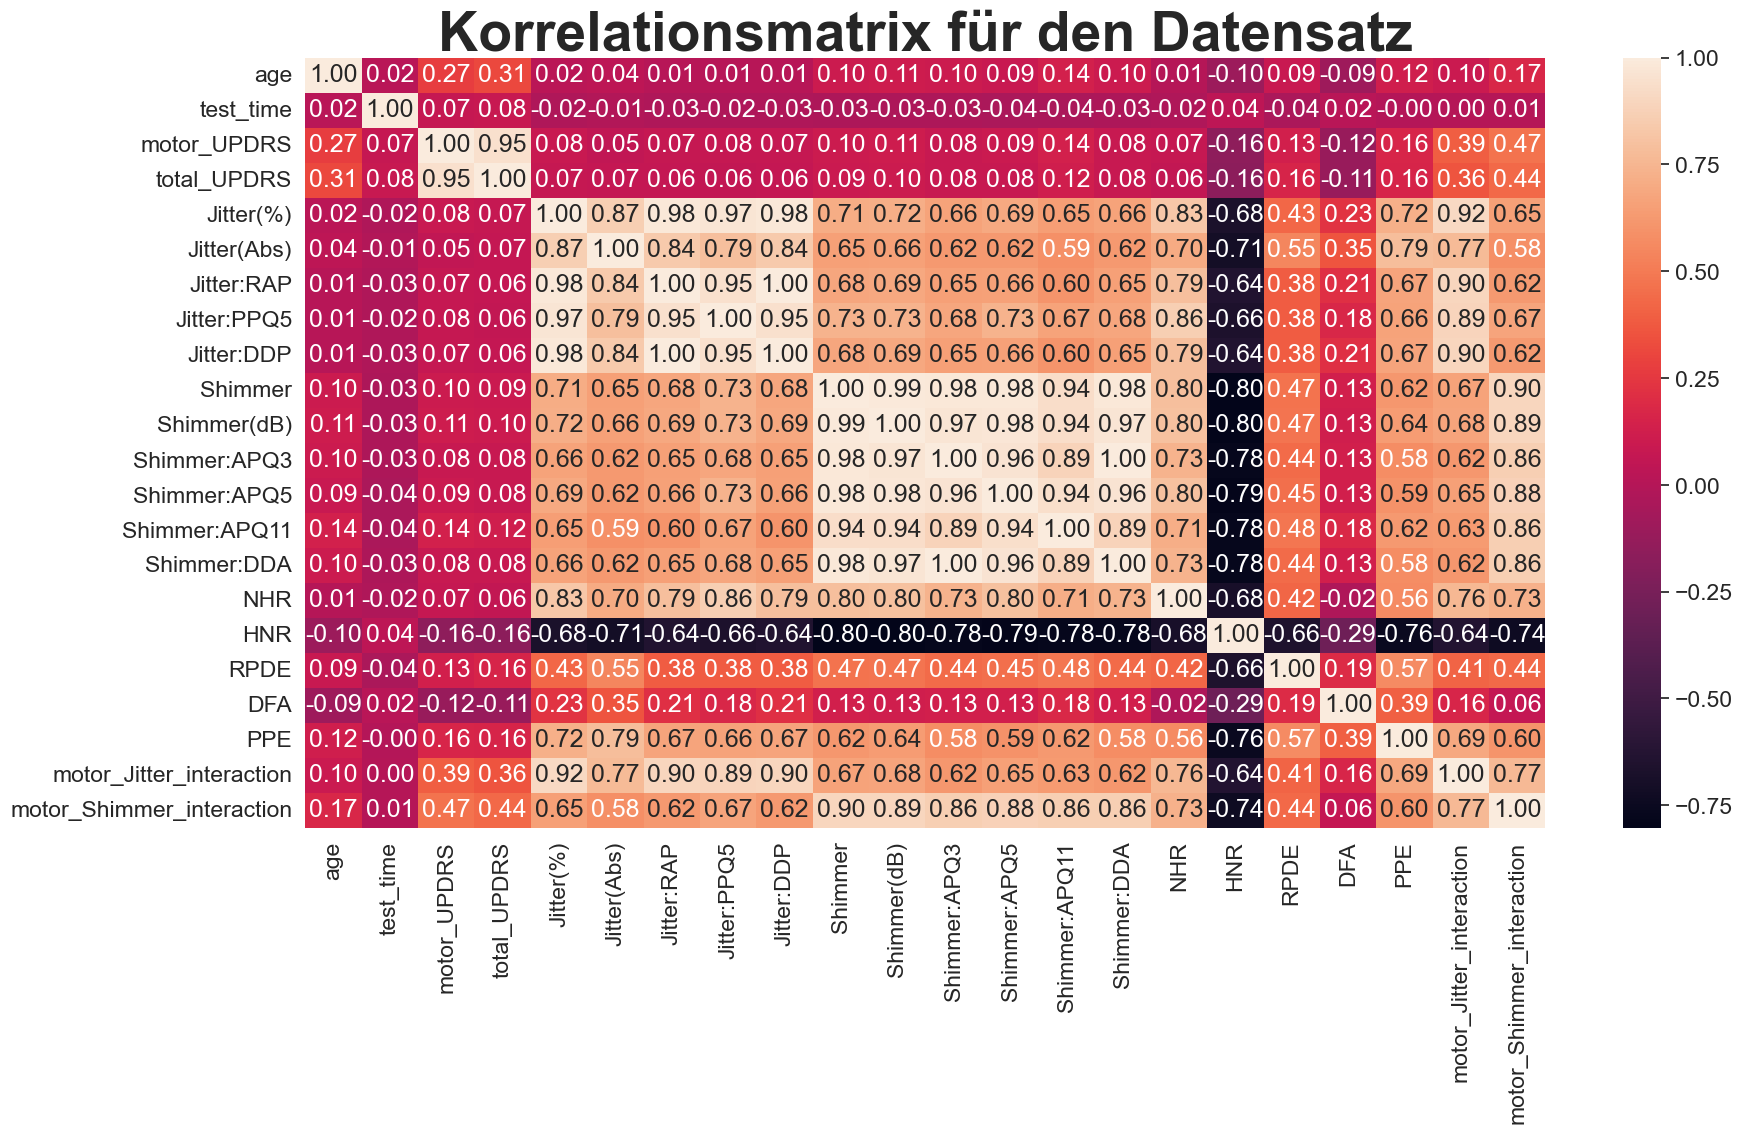

In [20]:
# Korrelationsmatrix erstellen
correlation_matrix = df.corr()

# Korrelationsmatrix visualisieren
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Korrelationsmatrix für den Datensatz', fontsize = "40", fontweight="bold")
plt.show()

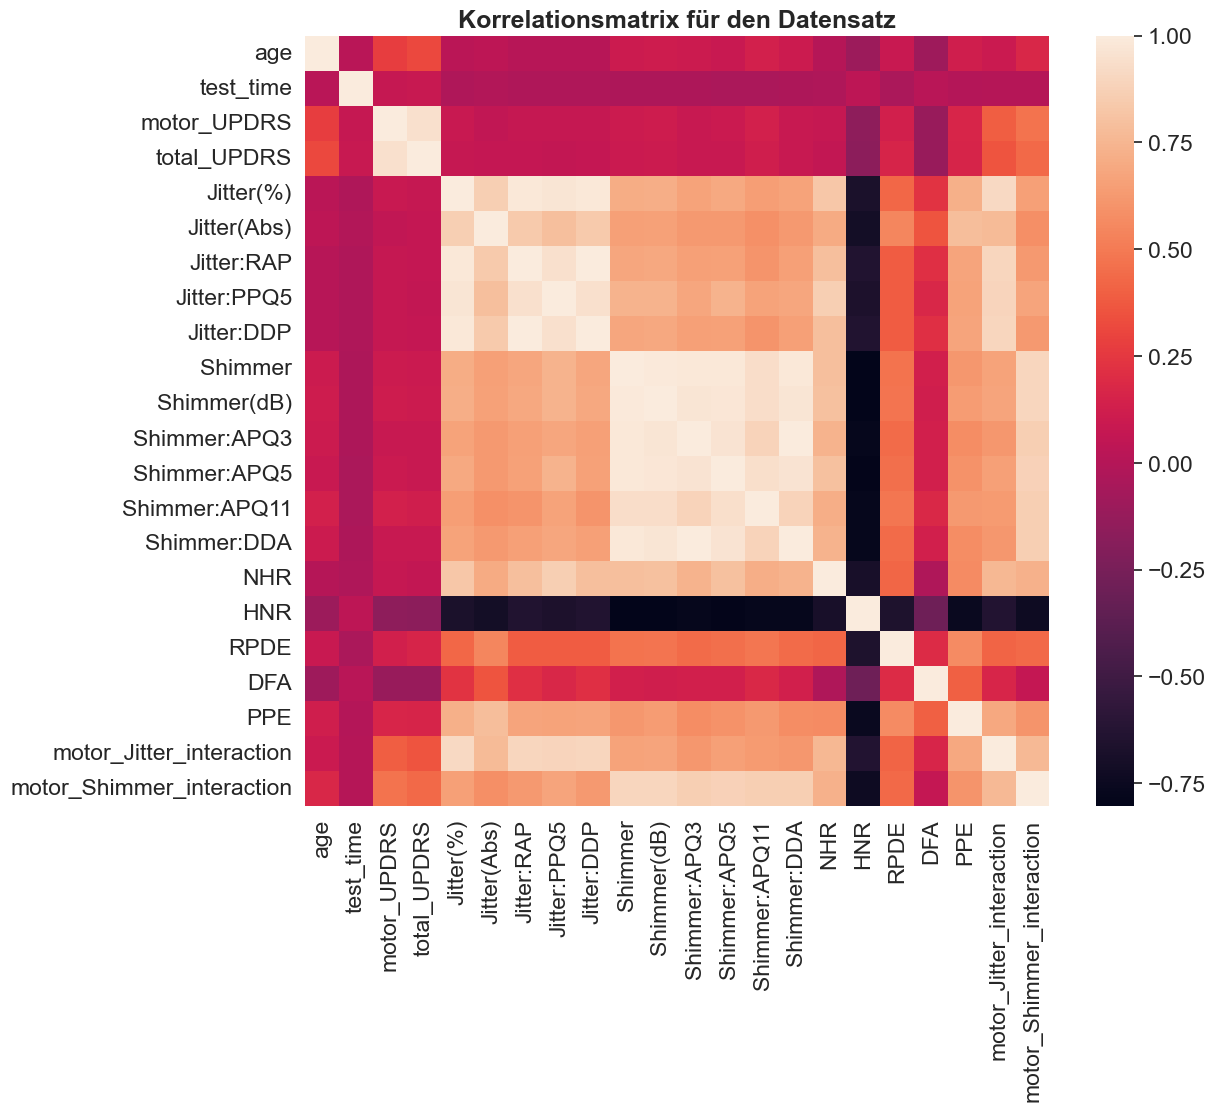

In [21]:
# Korrelationsmatrix erstellen
correlation_matrix = df.corr()

# Korrelationsmatrix visualisieren
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, fmt=".2f")
plt.title('Korrelationsmatrix für den Datensatz', fontweight="bold")
plt.show()

#### Farbskala
Die Farbskala rechts von der Heatmap zeigt den Bereich der Korrelationskoeffizienten, die von -1 bis 1 reichen können. In dieser Heatmap zeigt nahe +1 eine hohe positive Korrelation, nahe 0 zeigt keine Korrelation, und nahe -1 zeigt eine negative Korrelation. Beispielsweise zeigen die Zellen in der Reihe für motor_UPDRS und in der Spalte für total_UPDRS eine hohe positive Korrelation zwischen diesen beiden Variablen an, was durch die Farbe und 0.95 angezeigt wird.

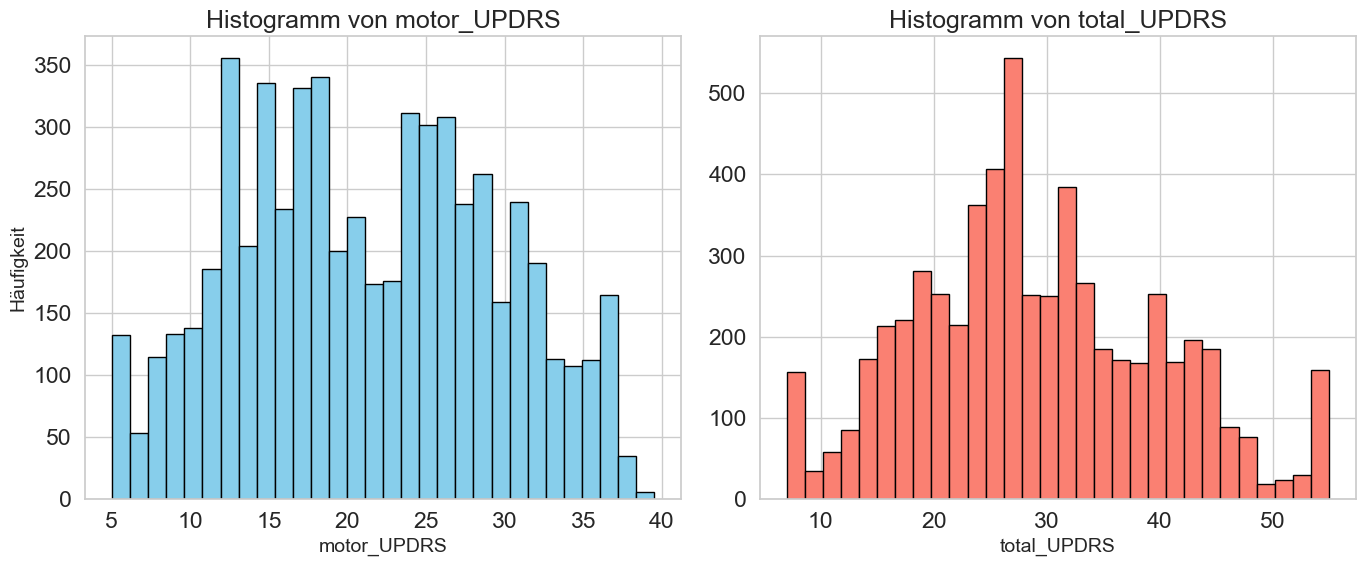

In [23]:
# Erstellung von Histogrammen für die motor_UPDRS und total_UPDRS Werte
plt.figure(figsize=(14, 6))

# Histogramm für motor_UPDRS
plt.subplot(1, 2, 1)  # 1 Zeile, 2 Spalten, 1. Subplot
plt.hist(df['motor_UPDRS'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogramm von motor_UPDRS')
plt.xlabel('motor_UPDRS')
plt.ylabel('Häufigkeit')

# Histogramm für total_UPDRS
plt.subplot(1, 2, 2)  # 1 Zeile, 2 Spalten, 2. Subplot
plt.hist(df['total_UPDRS'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogramm von total_UPDRS')
plt.xlabel('total_UPDRS')

# Anzeigen der Histogramme
plt.tight_layout()
plt.show()

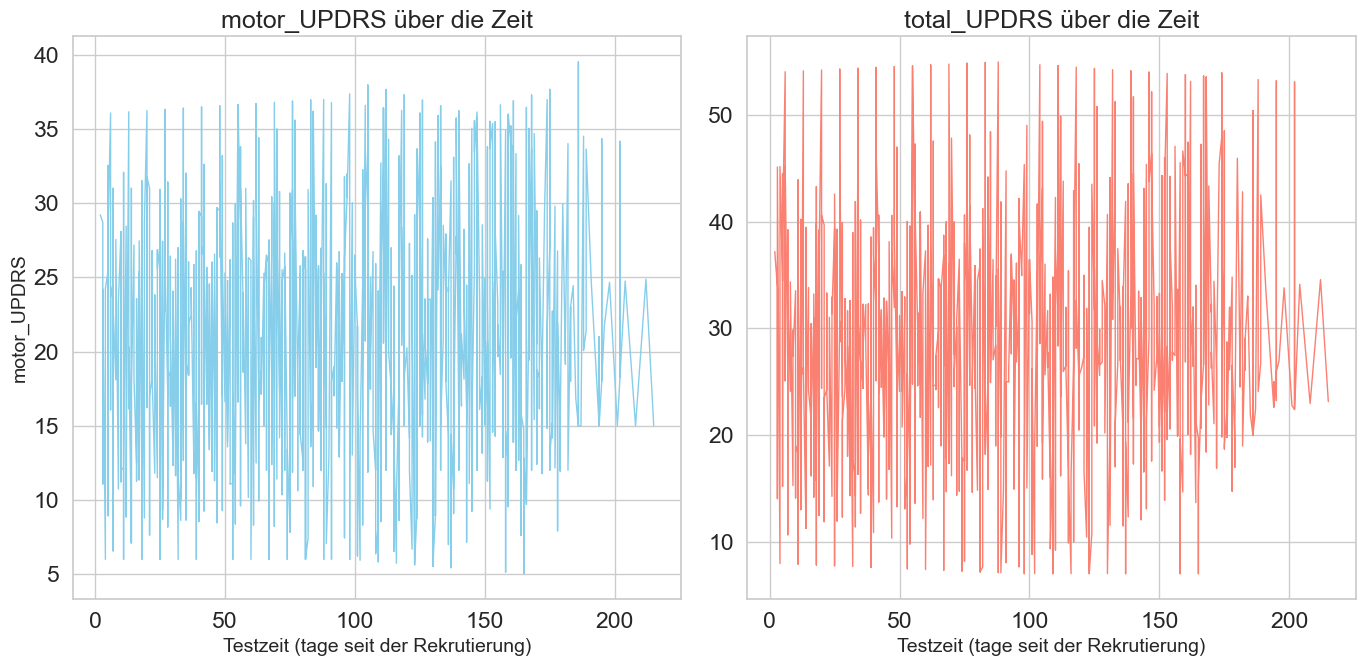

In [24]:
# Um Zeitreihenanalysen durchzuführen, sortieren wir den DataFrame zunächst nach der Zeit (test_time).
df_sorted = df.sort_values('test_time')

# Wir erstellen einen linearen Plot für motor_UPDRS und total_UPDRS über die Zeit.
plt.figure(figsize=(14, 7))

# motor_UPDRS über die Zeit
plt.subplot(1, 2, 1)
plt.plot(df_sorted['test_time'], df_sorted['motor_UPDRS'], color='skyblue', linewidth=1)
plt.title('motor_UPDRS über die Zeit')
plt.xlabel('Testzeit (tage seit der Rekrutierung)')
plt.ylabel('motor_UPDRS')

# total_UPDRS über die Zeit
plt.subplot(1, 2, 2)
plt.plot(df_sorted['test_time'], df_sorted['total_UPDRS'], color='salmon', linewidth=1)
plt.title('total_UPDRS über die Zeit')
plt.xlabel('Testzeit (tage seit der Rekrutierung)')

plt.tight_layout()
plt.show()

 Da die Daten wahrscheinlich mehrere Aufnahmen für einzelne Patienten enthalten, können die Linienplots für einzelne Patienten verwirrend sein. Daher kann es sinnvoll sein, Durchschnittswerte über bestimmte Zeitintervalle zu betrachten. Hierfür könnten wir beispielsweise gleitende Durchschnitte verwenden. Aber für den Moment zeigen diese Plots die allgemeinen Trends der UPDRS-Scores über die Zeit für alle Patienten.

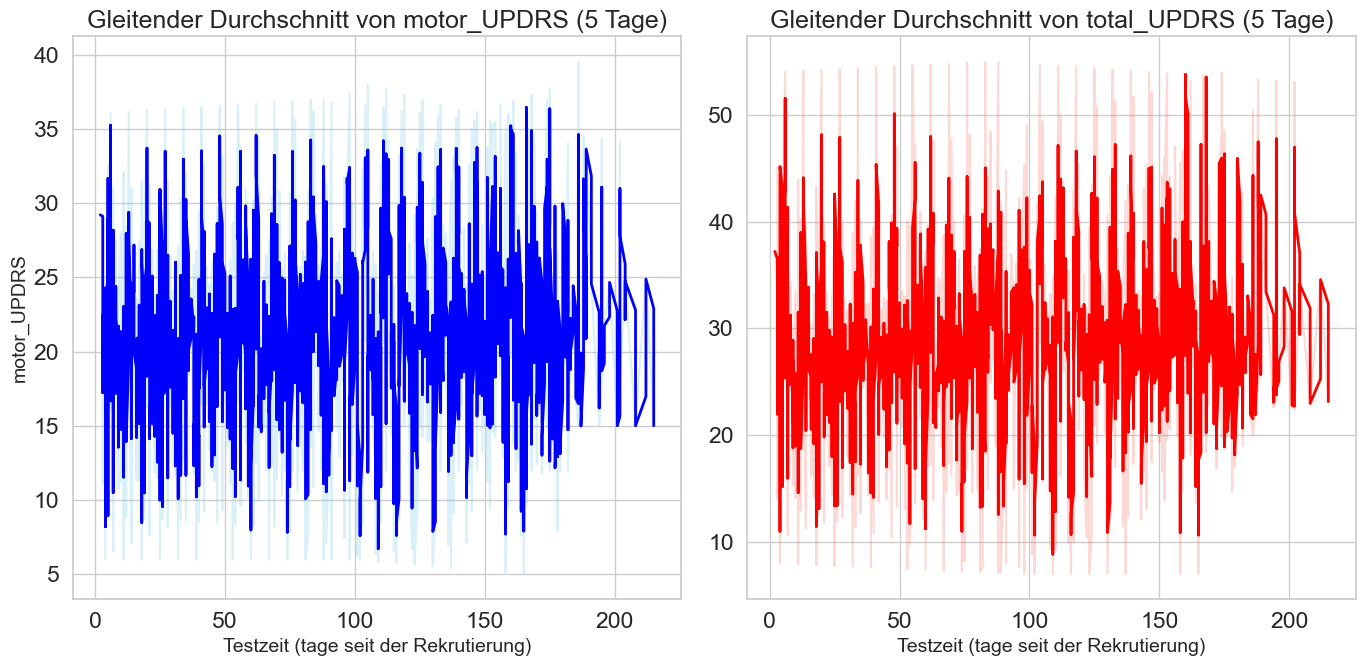

In [25]:
import numpy as np

# Funktion zum Berechnen des gleitenden Durchschnitts mit einer Fenstergröße von 5 Tagen
def rolling_mean(time_series, window_size=5):
    return time_series.rolling(window=window_size).mean()

# Anwenden des gleitenden Durchschnitts auf die motor_UPDRS und total_UPDRS Werte
df_sorted['motor_UPDRS_ma'] = rolling_mean(df_sorted['motor_UPDRS'])
df_sorted['total_UPDRS_ma'] = rolling_mean(df_sorted['total_UPDRS'])

# Gruppieren der Daten nach Probanden und Anwenden des gleitenden Durchschnitts
grouped = df_sorted.groupby('subject#')
individual_rolling_means = {subject: rolling_mean(group['total_UPDRS']) for subject, group in grouped}

# Visualisieren des gleitenden Durchschnitts für den ersten Probanden als Beispiel
plt.figure(figsize=(14, 7))

# motor_UPDRS mit gleitendem Durchschnitt
plt.subplot(1, 2, 1)
plt.plot(df_sorted['test_time'], df_sorted['motor_UPDRS'], alpha=0.3, color='skyblue')  # Originalwerte
plt.plot(df_sorted['test_time'], df_sorted['motor_UPDRS_ma'], color='blue', linewidth=2)  # Gleitender Durchschnitt
plt.title('Gleitender Durchschnitt von motor_UPDRS (5 Tage)')
plt.xlabel('Testzeit (tage seit der Rekrutierung)')
plt.ylabel('motor_UPDRS')

# total_UPDRS mit gleitendem Durchschnitt
plt.subplot(1, 2, 2)
plt.plot(df_sorted['test_time'], df_sorted['total_UPDRS'], alpha=0.3, color='salmon')  # Originalwerte
plt.plot(df_sorted['test_time'], df_sorted['total_UPDRS_ma'], color='red', linewidth=2)  # Gleitender Durchschnitt
plt.title('Gleitender Durchschnitt von total_UPDRS (5 Tage)')
plt.xlabel('Testzeit (tage seit der Rekrutierung)')

plt.tight_layout()
plt.show()



Für die Zeitreihenmodellierung, insbesondere ARIMA, müssen wir zunächst die Stationarität der Zeitreihe überprüfen und dann das Modell anpassen. Dies ist ein komplexerer Prozess und wird in mehreren Schritten durchgeführt. Hier zeigen wir vorerst nur die Anwendung des gleitenden Durchschnitts.

### Auswertung Testperson (subject# )

In [26]:
# Anzahl eindeutigen männlichen und weiblichen Teilnehmer, unter der Annahme, dass 'subject#' pro Teilnehmer eindeutig ist
unique_sex_counts = df.drop_duplicates(subset='subject#')['sex'].value_counts()
print("Anzahl der eindeutigen männlichen (M) und weiblichen (F) Teilnehmer:")
print(unique_sex_counts)

Anzahl der eindeutigen männlichen (M) und weiblichen (F) Teilnehmer:
M    28
F    14
Name: sex, dtype: int64


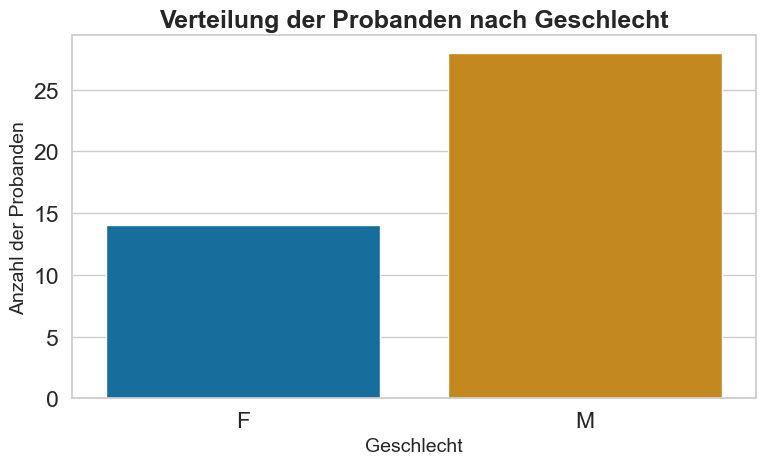

In [27]:
# Datentyp nochmals sichern
df['sex'] = df['sex'].astype('category')
df['subject#'] = df['subject#'].astype('category')

# Teilnehmer zählen 
unique_counts = df.groupby('sex')['subject#'].nunique()

# Balkendiagramm für die Anzahl eindeutiger Probanden nach Geschlecht
plt.figure(figsize=(8, 5))
sns.barplot(x=unique_counts.index, y=unique_counts.values)
plt.title('Verteilung der Probanden nach Geschlecht', fontweight="bold") 
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl der Probanden')

plt.tight_layout()
plt.show()

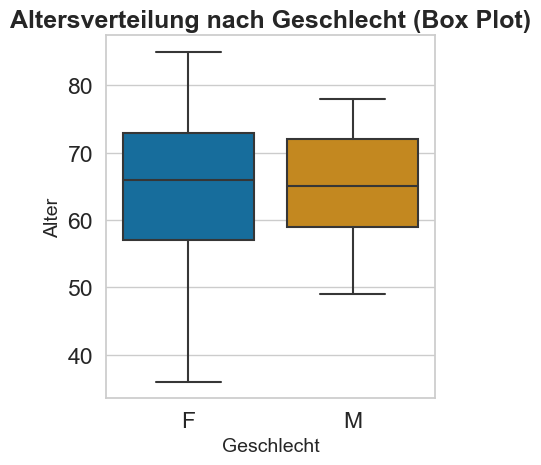

In [28]:
# Erstellen der Plots
plt.figure(figsize=(8, 5))

# Erstellen des Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='age', data=df)
plt.title('Altersverteilung nach Geschlecht (Box Plot)', fontweight="bold")
plt.xlabel('Geschlecht')
plt.ylabel('Alter')

plt.tight_layout()
plt.show()

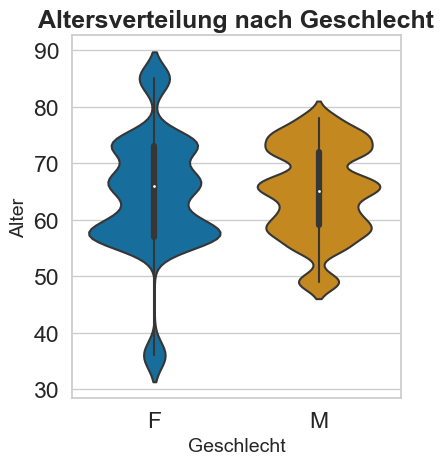

In [29]:
# Erstellen der Plots
plt.figure(figsize=(8, 5))

# Erstellen des violin plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.violinplot(x='sex', y='age', data=df)
plt.title('Altersverteilung nach Geschlecht', fontweight="bold")
plt.xlabel('Geschlecht')
plt.ylabel('Alter')

plt.tight_layout()
plt.show()

In [30]:
# Anzahl der Messungen pro Geschlecht
measurement_counts = df['sex'].value_counts()
print(measurement_counts)

M    4008
F    1867
Name: sex, dtype: int64


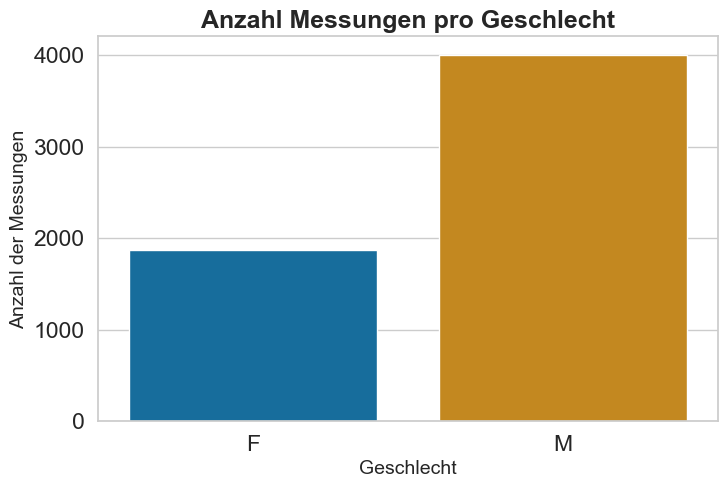

In [31]:
# Erstellen des Box Plot
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=measurement_counts.index, y=measurement_counts.values)

plt.title('Anzahl Messungen pro Geschlecht', fontweight='bold')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl der Messungen')

plt.show()

In [32]:
measurements_per_subject = df.groupby('subject#').size()

# Berechnet den Durchschnitt der Beobachtungen pro Testperson und konvertiere das Ergebnis in eine Ganzzahl
average_observations_int = int(round(measurements_per_subject.mean()))

print("\nDurchschnittliche Anzahl der Messpunkte pro Testperson, als ganze Zahl:")
print(average_observations_int)


Durchschnittliche Anzahl der Messpunkte pro Testperson, als ganze Zahl:
140


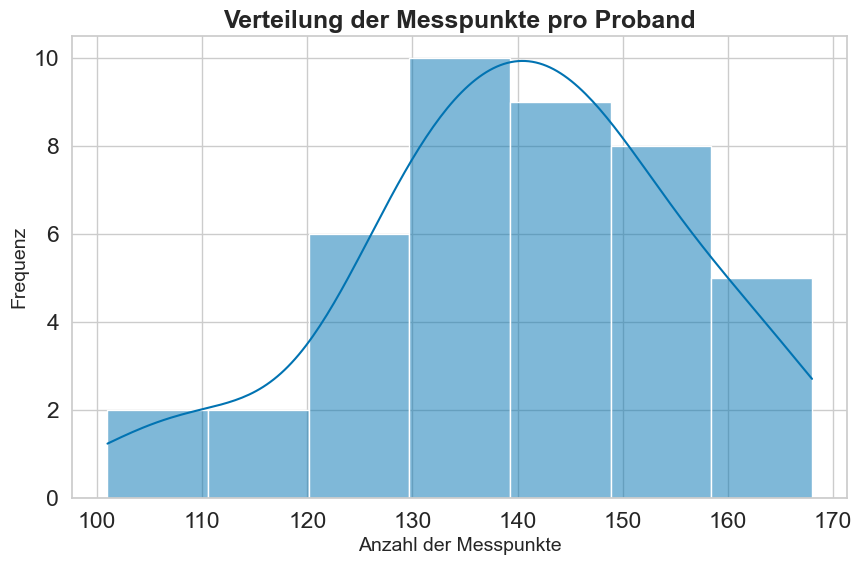

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(measurements_per_subject, kde=True)
plt.title('Verteilung der Messpunkte pro Proband', fontweight='bold')
plt.xlabel('Anzahl der Messpunkte')
plt.ylabel('Frequenz')
plt.show()

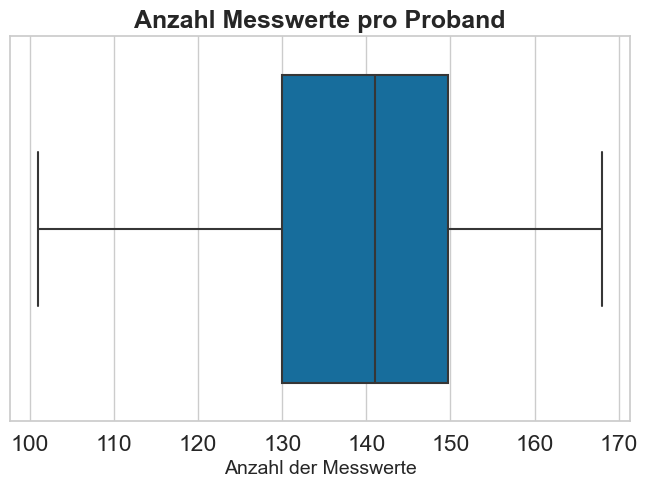

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=measurements_per_subject)
plt.title('Anzahl Messwerte pro Proband', fontweight='bold')
plt.xlabel('Anzahl der Messwerte')
plt.show()

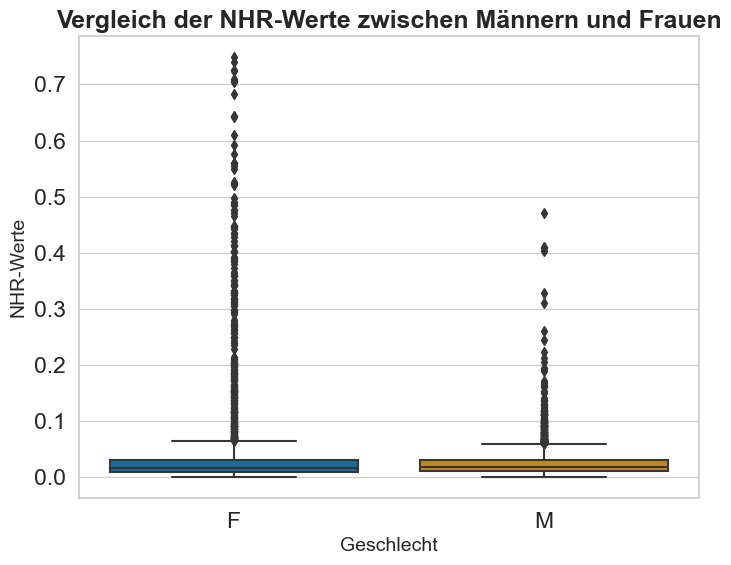

In [19]:
# Erstellen eines Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='NHR', data=df)
plt.title('Vergleich der NHR-Werte zwischen Männern und Frauen', fontweight='bold')
plt.xlabel('Geschlecht')
plt.ylabel('NHR-Werte')
plt.show()

Text(0, 0.5, 'NHR-Werte')

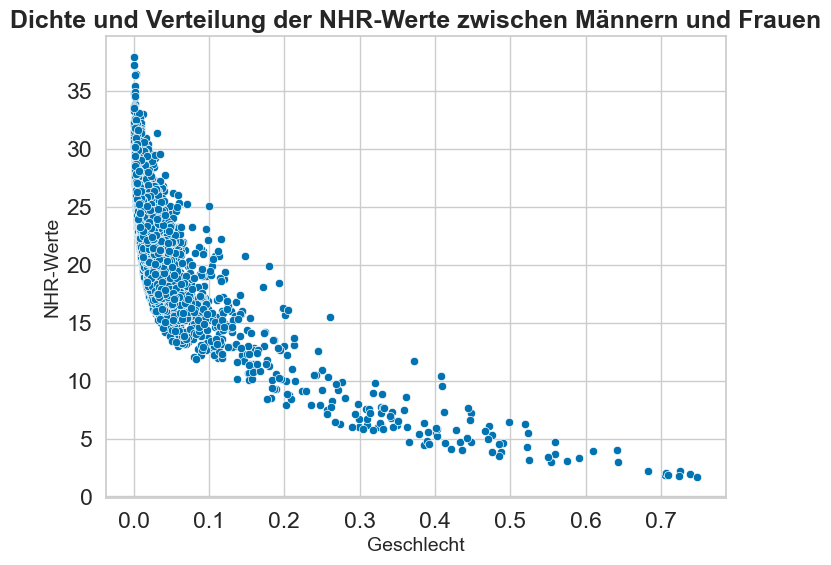

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="NHR",y="HNR",data=df)
plt.title('Dichte und Verteilung der NHR-Werte zwischen Männern und Frauen', fontweight='bold')
plt.xlabel('Geschlecht')
plt.ylabel('NHR-Werte')


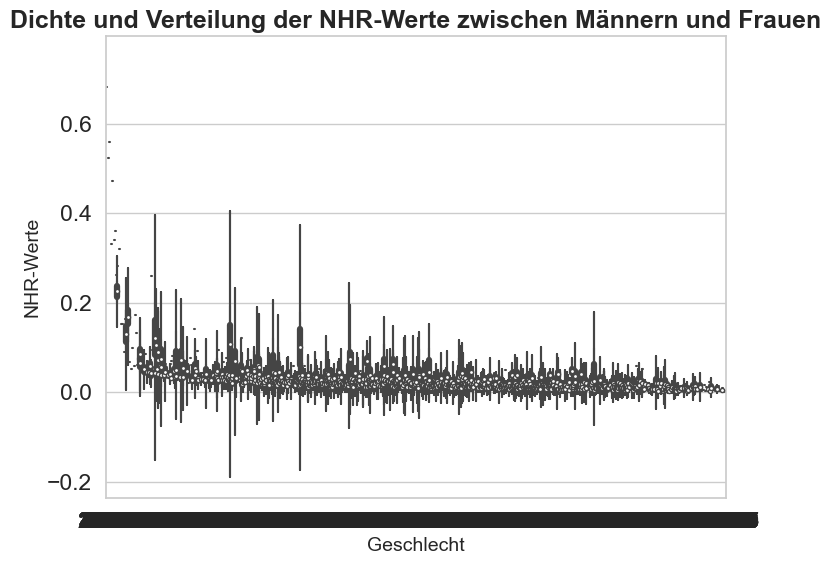

In [23]:
# Erstellen eines Violin Plots
plt.figure(figsize=(8, 6))
sns.violinplot(x='HNR', y='NHR', data=df)
plt.title('Dichte und Verteilung der NHR-Werte zwischen Männern und Frauen', fontweight='bold')
plt.xlabel('Geschlecht')
plt.ylabel('NHR-Werte')
plt.show()

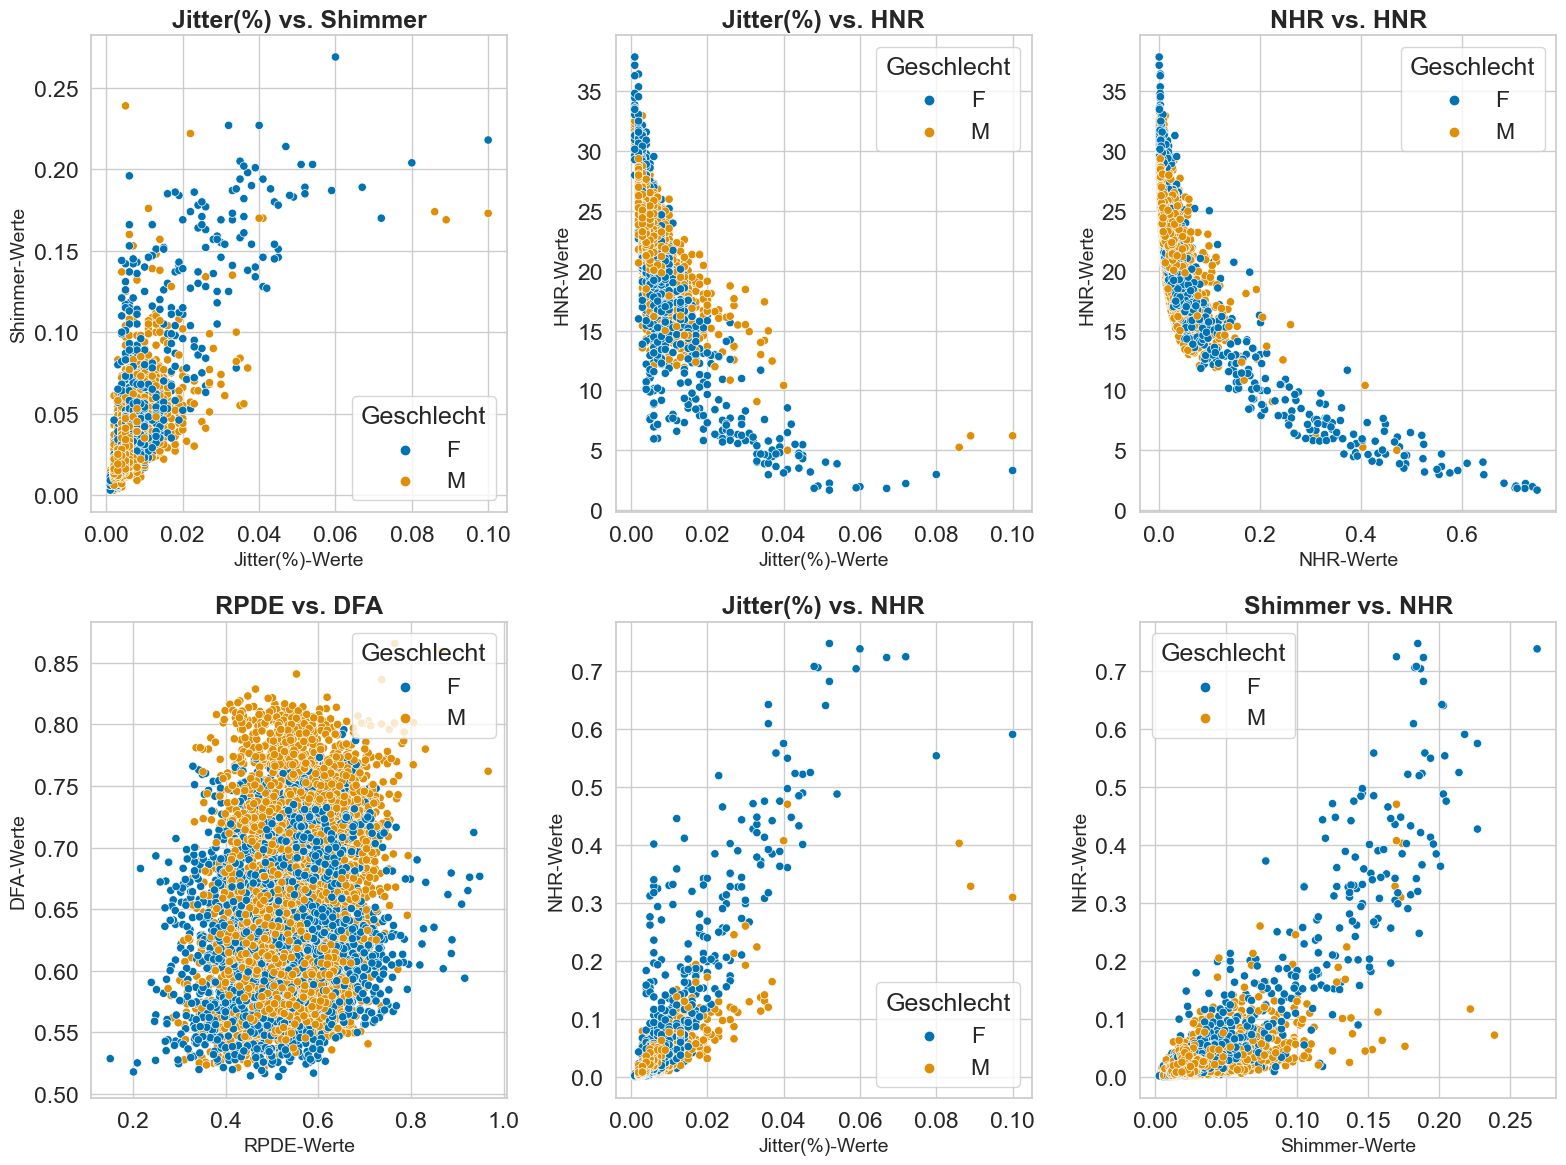

In [6]:
plt.figure(figsize=(16, 12))

# Subplot 1
plt.subplot(2, 3, 1)
sns.scatterplot(x="Jitter(%)", y="Shimmer", hue="sex", data=df)
plt.title('Jitter(%) vs. Shimmer', fontweight='bold')
plt.xlabel('Jitter(%)-Werte')
plt.ylabel('Shimmer-Werte')
plt.legend(title='Geschlecht')

# Subplot 2
plt.subplot(2, 3, 2)
sns.scatterplot(x="Jitter(%)", y="HNR", hue="sex", data=df)
plt.title('Jitter(%) vs. HNR', fontweight='bold')
plt.xlabel('Jitter(%)-Werte')
plt.ylabel('HNR-Werte')
plt.legend(title='Geschlecht')

# Subplot 3
plt.subplot(2, 3, 3)
sns.scatterplot(x="NHR", y="HNR", hue="sex", data=df)
plt.title('NHR vs. HNR', fontweight='bold')
plt.xlabel('NHR-Werte')
plt.ylabel('HNR-Werte')
plt.legend(title='Geschlecht')

# Subplot 4
plt.subplot(2, 3, 4)
sns.scatterplot(x="RPDE", y="DFA", hue="sex", data=df)
plt.title('RPDE vs. DFA', fontweight='bold')
plt.xlabel('RPDE-Werte')
plt.ylabel('DFA-Werte')
plt.legend(title='Geschlecht')

# Subplot 5
plt.subplot(2, 3, 5)
sns.scatterplot(x="Jitter(%)", y="NHR", hue="sex", data=df)
plt.title('Jitter(%) vs. NHR', fontweight='bold')
plt.xlabel('Jitter(%)-Werte')
plt.ylabel('NHR-Werte')
plt.legend(title='Geschlecht')

# Subplot 6
plt.subplot(2, 3, 6)
sns.scatterplot(x="Shimmer", y="NHR", hue="sex", data=df)
plt.title('Shimmer vs. NHR', fontweight='bold')
plt.xlabel('Shimmer-Werte')
plt.ylabel('NHR-Werte')
plt.legend(title='Geschlecht')

plt.tight_layout()
plt.show()

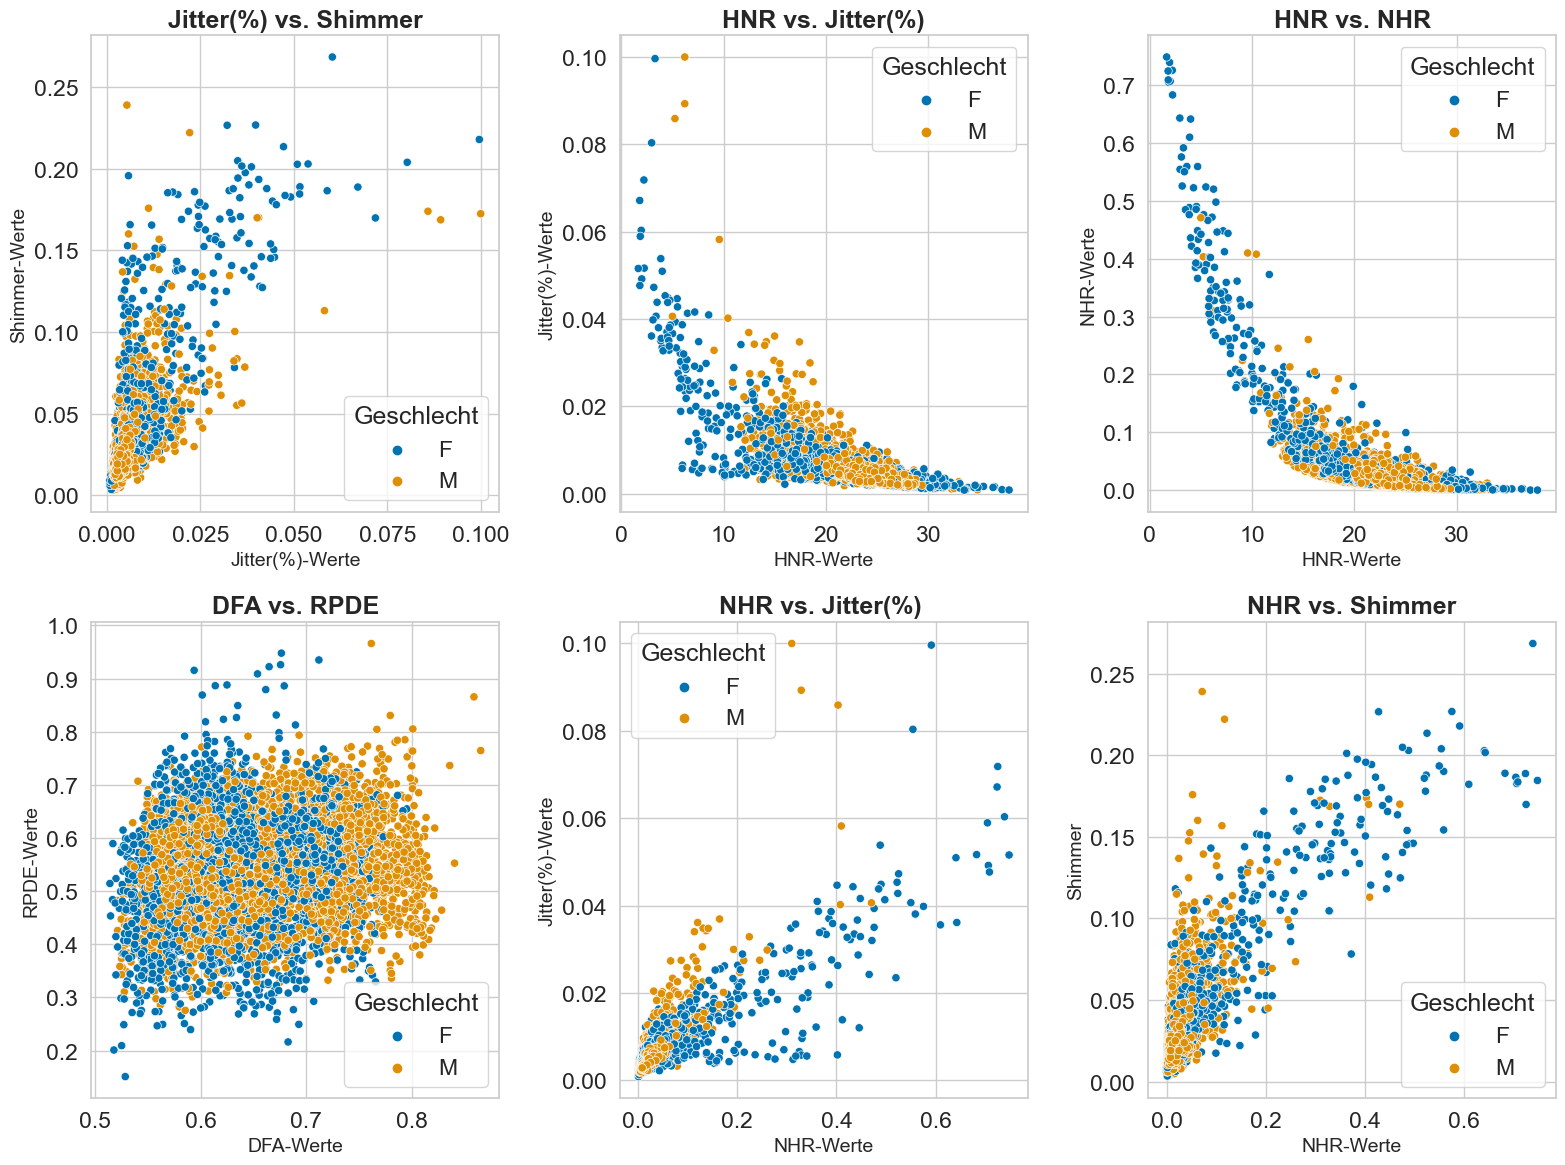

In [36]:
plt.figure(figsize=(16, 12))

# Subplot 1
plt.subplot(2, 3, 1)
sns.scatterplot(x="Jitter(%)", y="Shimmer", hue="sex", data=df)
plt.title('Jitter(%) vs. Shimmer', fontweight='bold')
plt.xlabel('Jitter(%)-Werte')
plt.ylabel('Shimmer-Werte')
plt.legend(title='Geschlecht')

# Subplot 2
plt.subplot(2, 3, 2)
sns.scatterplot(x="HNR",y="Jitter(%)", hue="sex", data=df)
plt.title('HNR vs. Jitter(%)', fontweight='bold')
plt.xlabel('HNR-Werte')
plt.ylabel('Jitter(%)-Werte')
plt.legend(title='Geschlecht')

# Subplot 3
plt.subplot(2, 3, 3)
sns.scatterplot(x="HNR",y= "NHR", hue="sex", data=df)
plt.title('HNR vs. NHR', fontweight='bold')
plt.xlabel('HNR-Werte')
plt.ylabel('NHR-Werte')
plt.legend(title='Geschlecht')


# Subplot 4
plt.subplot(2, 3, 4)
sns.scatterplot(x="DFA", y="RPDE", hue="sex", data=df)
plt.title('DFA vs. RPDE', fontweight='bold')
plt.xlabel('DFA-Werte')
plt.ylabel('RPDE-Werte')
plt.legend(title='Geschlecht')

# Subplot 5
plt.subplot(2, 3, 5)
sns.scatterplot(x="NHR", y="Jitter(%)", hue="sex", data=df)
plt.title('NHR vs. Jitter(%) ', fontweight='bold')
plt.xlabel('NHR-Werte')
plt.ylabel('Jitter(%)-Werte')
plt.legend(title='Geschlecht')

# Subplot 6
plt.subplot(2, 3, 6)
sns.scatterplot(x="NHR", y="Shimmer", hue="sex", data=df)
plt.title('NHR vs. Shimmer', fontweight='bold')
plt.xlabel('NHR-Werte')
plt.ylabel('Shimmer')
plt.legend(title='Geschlecht')

plt.tight_layout()


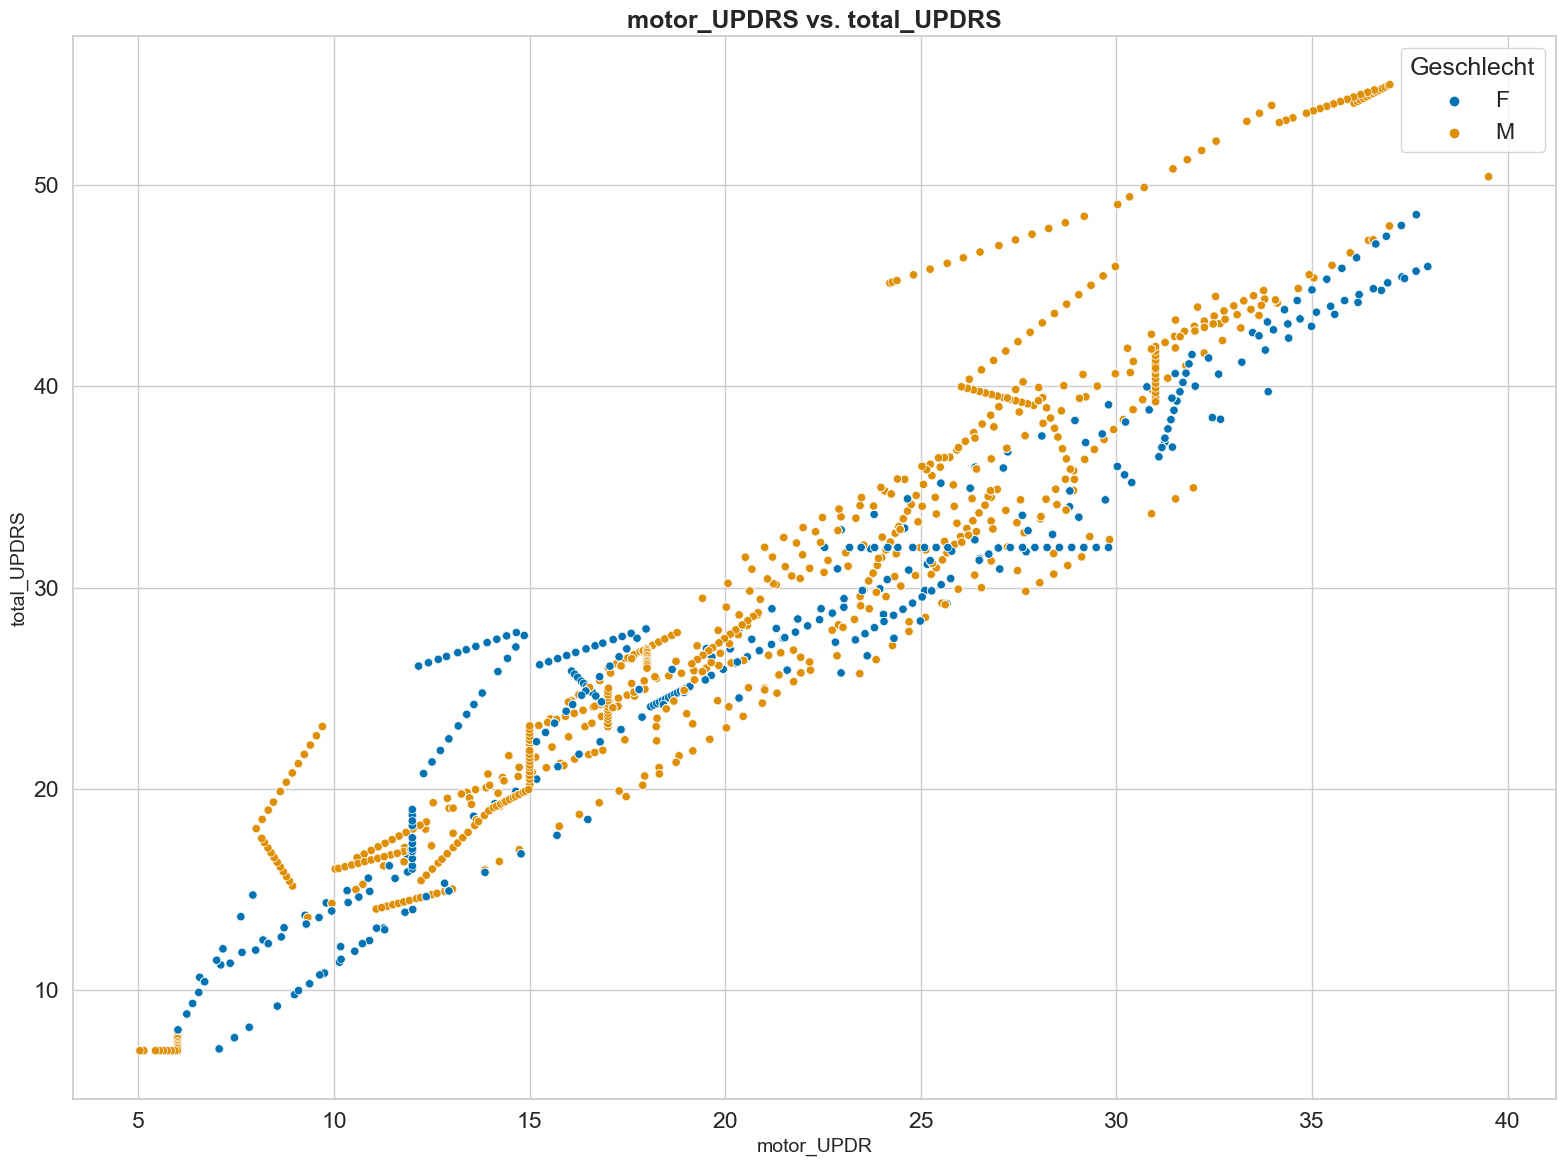

In [30]:
plt.figure(figsize=(16, 12))
sns.scatterplot(x="motor_UPDRS", y="total_UPDRS", hue="sex", data=df)
plt.title('motor_UPDRS vs. total_UPDRS', fontweight='bold')
plt.xlabel('motor_UPDR')
plt.ylabel('total_UPDRS')
plt.legend(title='Geschlecht')
plt.tight_layout()

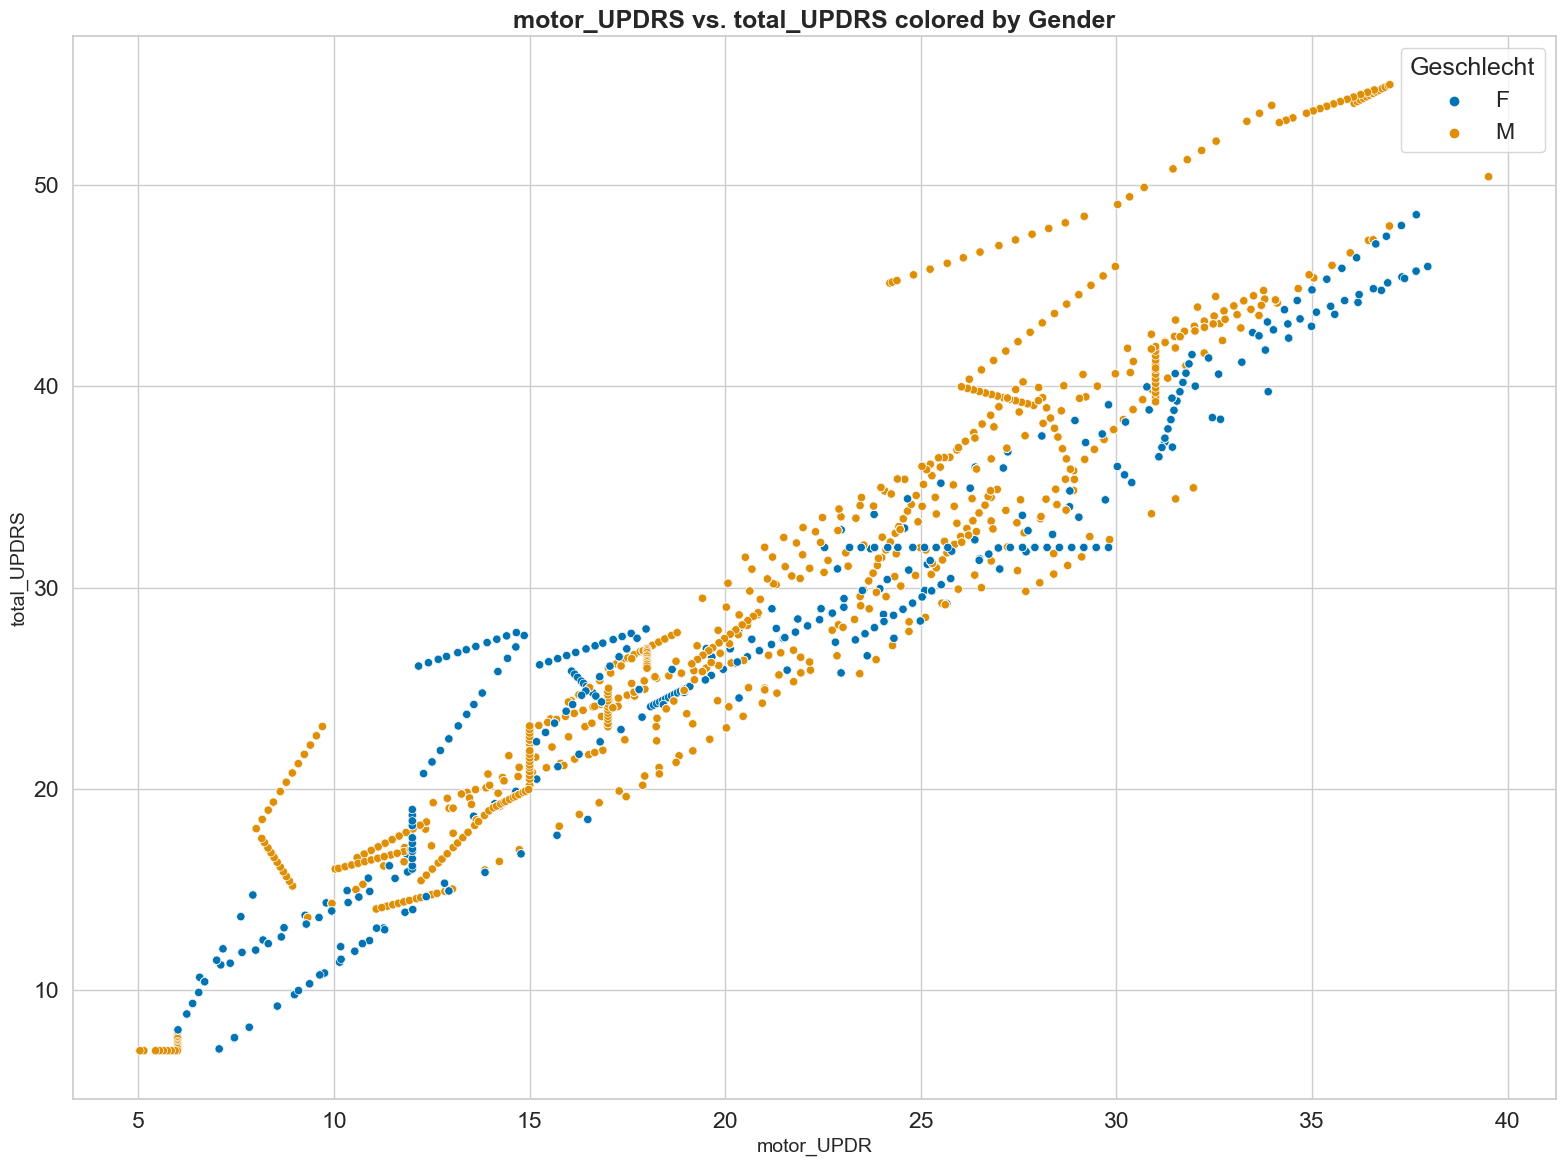

In [32]:
plt.figure(figsize=(16, 12))
sns.scatterplot(x="motor_UPDRS", y="total_UPDRS", hue="sex", data=df)
plt.title('motor_UPDRS vs. total_UPDRS colored by Gender', fontweight='bold')
plt.xlabel('motor_UPDR')
plt.ylabel('total_UPDRS')
plt.legend(title='Geschlecht')
plt.tight_layout()

/var/folders/xy/147g5f7n6_3drk3yjhgd27f80000gn/T/ipykernel_78231/1696802142.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[['total_UPDRS', 'Jitter(%)']], ci=None)


Text(0, 0.5, 'Wert')

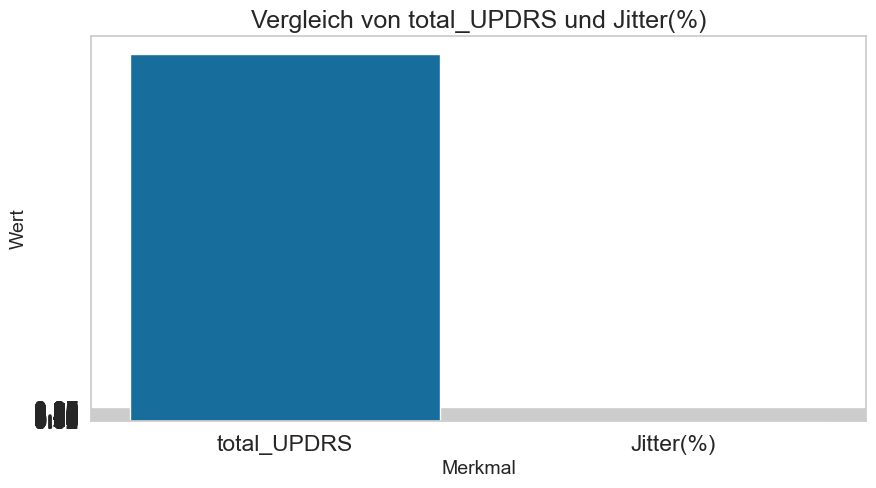

In [9]:
plt.figure(figsize=(10,5))  # Einstellen der Größe der Abbildung (Breite = 10, Höhe = 5)

# Seaborn Barplot zur Darstellung von total_UPDRS und Jitter(%)
sns.barplot(data=df[['total_UPDRS', 'Jitter(%)']], ci=None)

plt.yticks([i/100 for i in range(0, 100, 1)])

plt.title("Vergleich von total_UPDRS und Jitter(%)")  # Einstellen des Titels der Abbildung
plt.xlabel("Merkmal")  # Beschriftung der x-Achse
plt.ylabel("Wert")  # Beschriftung der y-Achse

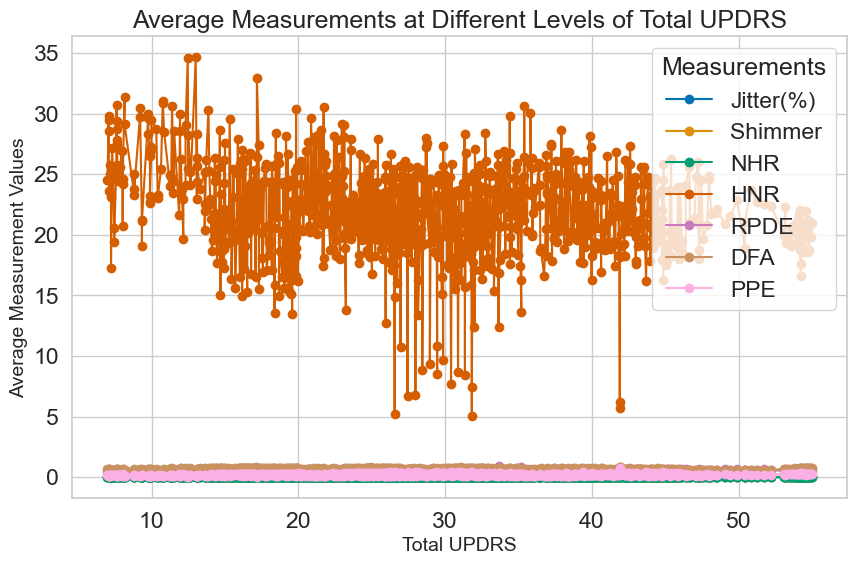

In [10]:
# Liste der Variablen für die Darstellung neben 'total_UPDRS'
variables = ['Jitter(%)', 'Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

# Erstellen eines neuen DataFrame, der den Durchschnitt der Messwerte für jede 'total_UPDRS'-Stufe enthält
avg_data = df.groupby('total_UPDRS')[variables].mean().reset_index()

# Erstellen eines Balkendiagramms
plt.figure(figsize=(10, 6))
for variable in variables:
    plt.plot(avg_data['total_UPDRS'], avg_data[variable], marker='o', label=variable)

plt.xlabel('Total UPDRS')
plt.ylabel('Average Measurement Values')
plt.title('Average Measurements at Different Levels of Total UPDRS')
plt.legend(title='Measurements')
plt.grid(True)

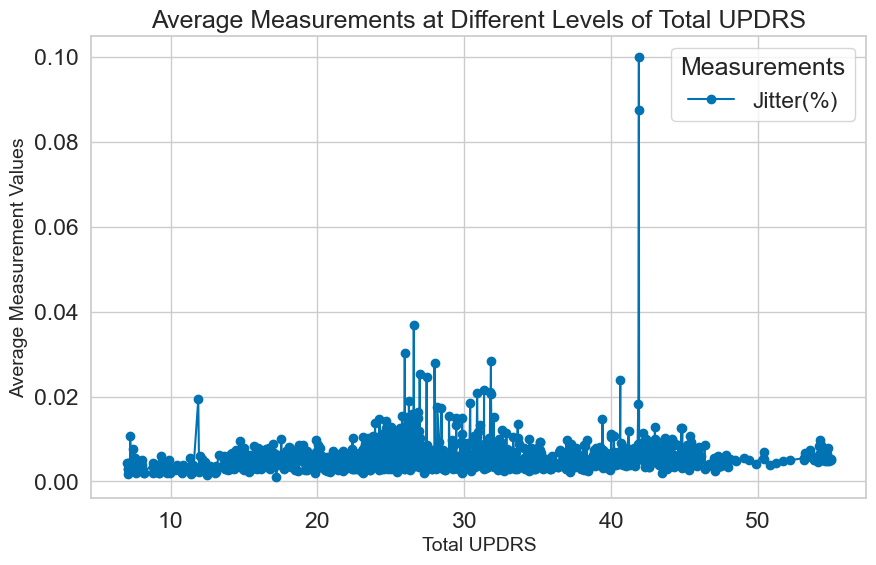

In [12]:
# Liste der Variablen für die Darstellung neben 'total_UPDRS'
variables = ['Jitter(%)']

# Erstellen eines neuen DataFrame, der den Durchschnitt der Messwerte für jede 'total_UPDRS'-Stufe enthält
avg_data = df.groupby('total_UPDRS')[variables].mean().reset_index()

# Erstellen eines Balkendiagramms
plt.figure(figsize=(10, 6))
for variable in variables:
    plt.plot(avg_data['total_UPDRS'], avg_data[variable], marker='o', label=variable)

plt.xlabel('Total UPDRS')
plt.ylabel('Average Measurement Values')
plt.title('Average Measurements at Different Levels of Total UPDRS')
plt.legend(title='Measurements')
plt.grid(True)

/var/folders/xy/147g5f7n6_3drk3yjhgd27f80000gn/T/ipykernel_78231/1576584494.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subject_data = df.groupby('subject#')[['total_UPDRS'] + variables].mean().reset_index()


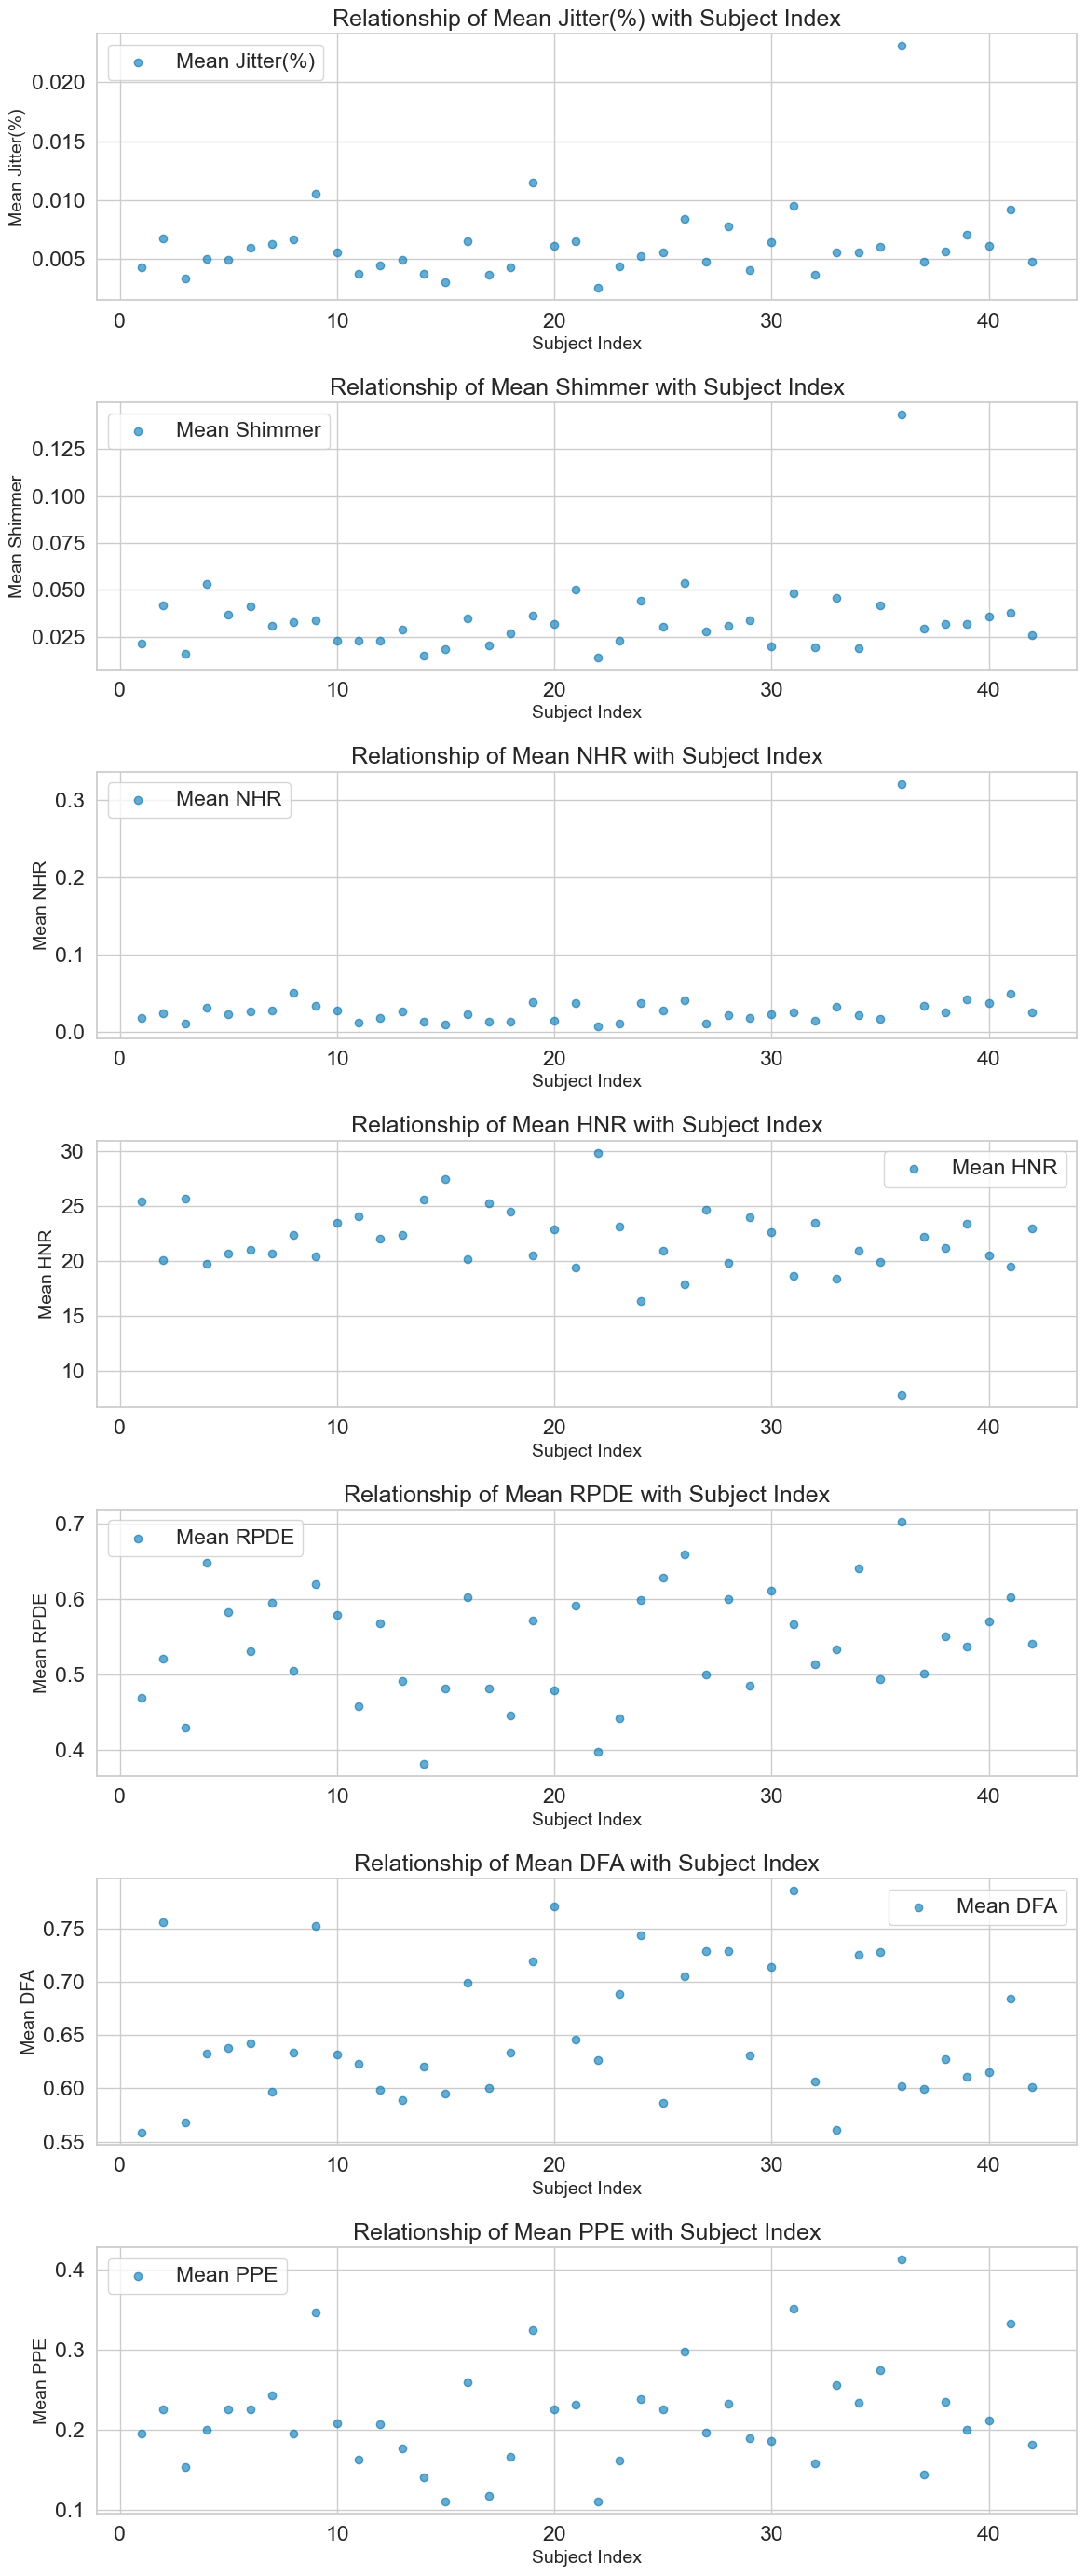

In [15]:
subject_data = df.groupby('subject#')[['total_UPDRS'] + variables].mean().reset_index()

# Erstellen eines Plots für jede Variable gegen total_UPDRS
fig, axes = plt.subplots(len(variables), 1, figsize=(12, 4 * len(variables)))

for i, variable in enumerate(variables):
    axes[i].scatter(subject_data['subject#'], subject_data[variable], alpha=0.6, label=f'Mean {variable}')
    axes[i].set_xlabel('Subject Index')
    axes[i].set_ylabel(f'Mean {variable}')
    axes[i].set_title(f'Relationship of Mean {variable} with Subject Index')
    axes[i].legend()

plt.tight_layout()

/var/folders/xy/147g5f7n6_3drk3yjhgd27f80000gn/T/ipykernel_78231/488465860.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subject_data = df.groupby('subject#')[['total_UPDRS'] + variables].mean().reset_index()


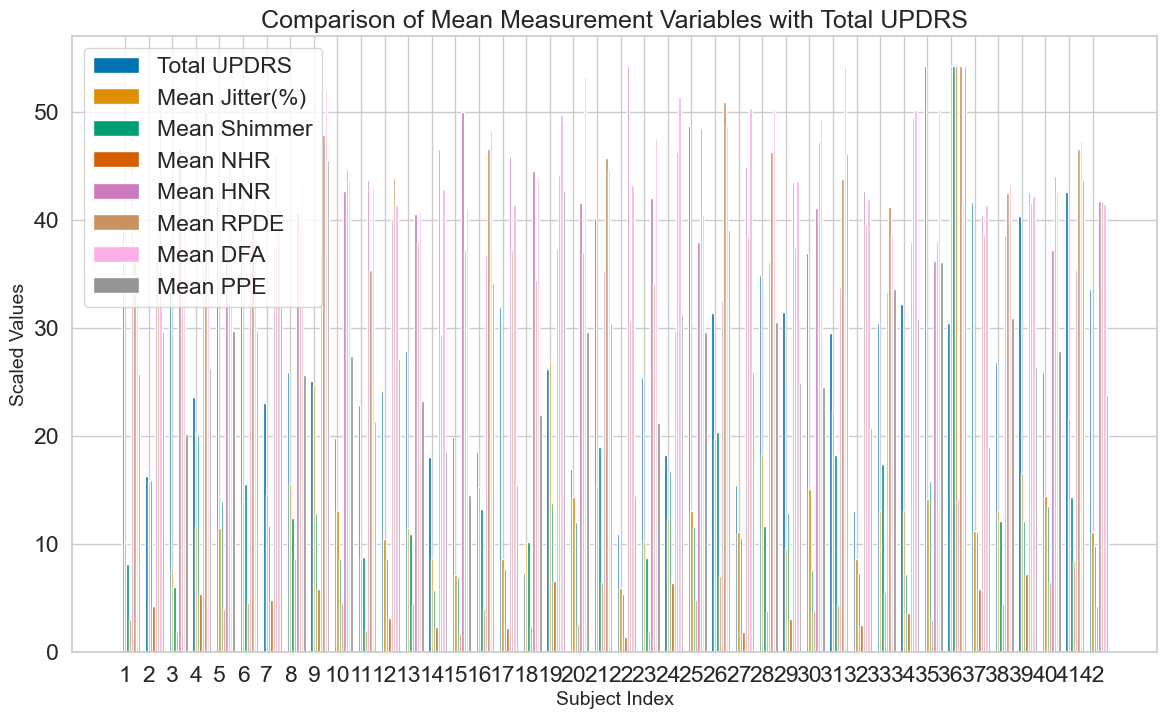

In [17]:
# Aggregation der Daten, um den Durchschnitt jeder Variable für jedes Subjekt zu finden
subject_data = df.groupby('subject#')[['total_UPDRS'] + variables].mean().reset_index()

# Normierung der Variablen, um sie mit total_UPDRS vergleichbar zu machen
subject_data_scaled = subject_data.copy()
for variable in variables:
    max_value = subject_data[variable].max()
    subject_data_scaled[variable] = (subject_data[variable] / max_value) * subject_data['total_UPDRS'].max()

# Erstellen eines kombinierten Balkendiagramms
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.1  # Breite der Balken
ind = np.arange(len(subject_data))  # die x locations für die Gruppen

# Balken für total_UPDRS
ax.bar(ind, subject_data['total_UPDRS'], width, label='Total UPDRS')

# Balken für jede andere Variable
for i, variable in enumerate(variables):
    ax.bar(ind + width * (i + 1), subject_data_scaled[variable], width, label=f'Mean {variable}')

ax.set_xlabel('Subject Index')
ax.set_ylabel('Scaled Values')
ax.set_title('Comparison of Mean Measurement Variables with Total UPDRS')
ax.set_xticks(ind + width)
ax.set_xticklabels(subject_data['subject#'])
ax.legend()

AttributeError: 'Axes' object has no attribute 'xlabel'

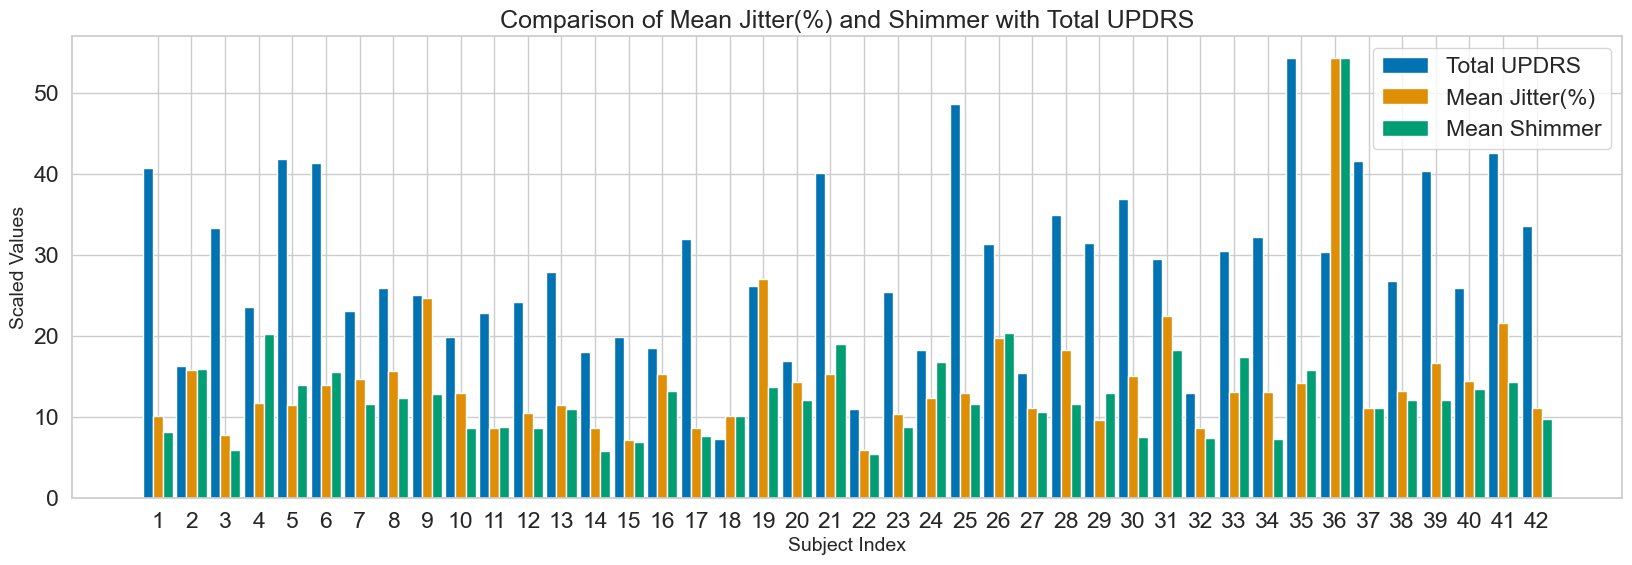

In [25]:
selected_variables = ['Jitter(%)', 'Shimmer']

# Normierung der ausgewählten Variablen, um sie mit total_UPDRS vergleichbar zu machen
subject_data_scaled = subject_data[['subject#', 'total_UPDRS'] + selected_variables].copy()
for variable in selected_variables:
    max_value = subject_data[variable].max()
    subject_data_scaled[variable] = (subject_data[variable] / max_value) * subject_data['total_UPDRS'].max()

# Erstellen eines kombinierten Balkendiagramms
fig, ax = plt.subplots(figsize=(20, 6))
width = 0.3  # Breite der Balken
ind = np.arange(len(subject_data))  # die x locations für die Gruppen

# Balken für total_UPDRS
ax.bar(ind - width, subject_data['total_UPDRS'], width, label='Total UPDRS')

# Balken für Jitter(%) und Shimmer
ax.bar(ind, subject_data_scaled['Jitter(%)'], width, label='Mean Jitter(%)')
ax.bar(ind + width, subject_data_scaled['Shimmer'], width, label='Mean Shimmer')

ax.set_xlabel('Subject Index')
ax.set_ylabel('Scaled Values')
ax.set_title('Comparison of Mean Jitter(%) and Shimmer with Total UPDRS')
ax.set_xticks(ind)
ax.set_xticklabels(subject_data['subject#'])
ax.legend()
ax.xlabel(0, df['subject#'].max())